In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import mercury as mr
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Create Mercury App
show_code = mr.Checkbox(label="Show code", value=False)
app = mr.App(title="DSBDA", description="Mini Project",show_code=show_code.value)

mercury.Checkbox

mercury.App

# Dataset at glance

In [9]:
employee_df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Dataset info

In [10]:
print(f'Dataset has {employee_df.shape[0]} rows and {employee_df.shape[1]} columns')

Dataset has 1470 rows and 35 columns


In [11]:
# Seperating column types
all_cols=employee_df.columns
numerical_columns=employee_df.select_dtypes(include=['int64']).columns
categorical_columns=employee_df.select_dtypes(include=['object']).columns

In [12]:
print(f'Dataset contains following columns:')
print('----------------------------------------------------------------------------------------------------')
print('Numerical columns:')
i=0
for c in numerical_columns:
    i+=1
    print(c,end=', ')
    if i%5==0:
        print()
print()
print('----------------------------------------------------------------------------------------------------')
print(f'Categorical columns:')
i=0
for c in categorical_columns:
    i+=1
    print(c,end=', ')
    if i%5==0:
        print()

Dataset contains following columns:
----------------------------------------------------------------------------------------------------
Numerical columns:
Age, DailyRate, DistanceFromHome, Education, EmployeeCount, 
EmployeeNumber, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, 
JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, 
PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, 
TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, 
YearsWithCurrManager, 
----------------------------------------------------------------------------------------------------
Categorical columns:
Attrition, BusinessTravel, Department, EducationField, Gender, 
JobRole, MaritalStatus, Over18, OverTime, 

# Data cleaning

## Checking Null Values

In [13]:
# check null values
if any(employee_df.isnull().any()):
    print('Null values present')
else:
    print('No null values found')

No null values found


## Checking duplicate records

In [15]:
# Check duplicate records
if employee_df.duplicated().any():
    print('Duplicate records present')
else:
    print('Duplicate records not found')

Duplicate records not found


## Checking Distinct Values in categorical columns

In [17]:
# Check distinct values
for column in categorical_columns:
    print(column)
    print(employee_df[column].unique())
    print('-------------------------------------------------------------------')

Attrition
['Yes' 'No']
-------------------------------------------------------------------
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
-------------------------------------------------------------------
Department
['Sales' 'Research & Development' 'Human Resources']
-------------------------------------------------------------------
EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
-------------------------------------------------------------------
Gender
['Female' 'Male']
-------------------------------------------------------------------
JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
-------------------------------------------------------------------
MaritalStatus
['Single' 'Married' 'Divorced']
-------------------------------------------------------------------


*   Over18 column has only Y[Yes] meaning every employee over18 so we don't need this information.


## Checking Distinct Values in numerical columns

In [18]:
# Check distinct values
for column in employee_df.select_dtypes(include=['int64']):
  if len(employee_df[column].unique())==1:
    print(column)
    print(employee_df[column].unique())
    print('--------------')

EmployeeCount
[1]
--------------
StandardHours
[80]
--------------



* Standard Hour has only unique value 80. So we don't need this column.

* Same including the 'EmployeeCount','EmployeeNumber' column.




## Droping useless columns

In [19]:
employee_df.drop(columns=['Over18','EmployeeCount','StandardHours','EmployeeNumber'],inplace=True)

'Over18', 'EmployeeCount', 'StandardHours', 'EmployeeNumber' columns have been dropped

In [20]:
# Updating column variables
all_cols=employee_df.columns
numerical_columns=list(employee_df.select_dtypes(include=['int64']).columns)
categorical_columns=list(employee_df.select_dtypes(include=['object']).columns)

## Converting binary categorical variables to integers

Before converting

In [21]:
employee_df[['Attrition','OverTime']].head()

,Attrition,OverTime
0,Yes,Yes
1,No,No
2,Yes,Yes
3,No,Yes
4,No,No


After converting

In [22]:
# Convert binary categorical variables to integers
employee_df['Attrition'] = employee_df['Attrition'].map({'Yes': 1, 'No': 0})
employee_df['OverTime'] = employee_df['OverTime'].map({'Yes': 1, 'No': 0})

In [23]:
employee_df[['Attrition','OverTime']].head()

,Attrition,OverTime
0,1,1
1,0,0
2,1,1
3,0,1
4,0,0


# Visualization

## Distribution plot

In [24]:
# Data Visualization

In [25]:
dist_col = mr.Select(value="Age", 
                   choices=numerical_columns, 
                   label="Distribution plot")

mercury.Select

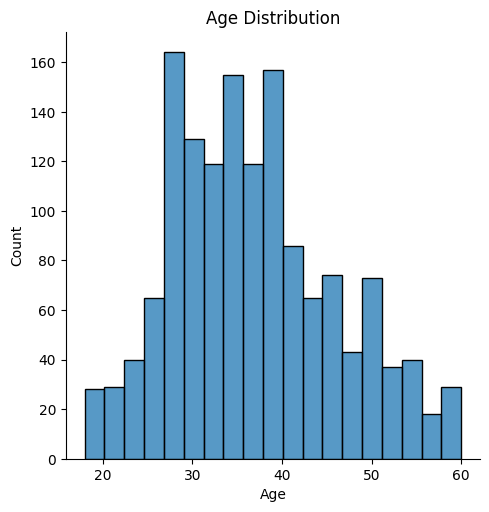

In [26]:
sns.displot(employee_df[dist_col.value])
plt.title(f'{dist_col.value} Distribution')
plt.show()

## Attrition distribution

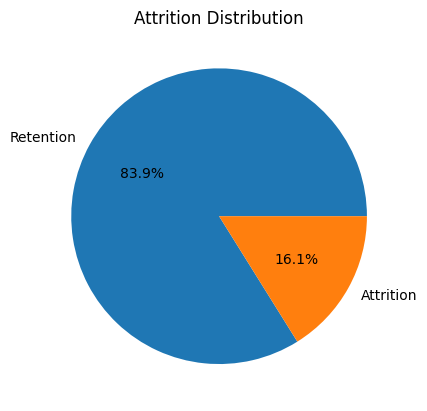

In [27]:
attrition_counts = employee_df['Attrition'].value_counts()
labels = ['Retention', 'Attrition']
plt.pie(attrition_counts, labels=labels, autopct='%1.1f%%')
plt.title('Attrition Distribution')
plt.show()

## Categorical column investigaton

In [28]:
categorical_columns.remove('Attrition')

In [29]:

def categorical_colum_investigaton(col_name):
    f,ax = plt.subplots(1,3, figsize=(18,6))
    employee_df[col_name].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
    employee_df[col_name].value_counts().plot.bar(cmap='Set3',ax=ax[1])
    ax[1].set_title(f'Number of Employee by {col_name}')
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(f'{col_name}')
    sns.countplot(x=col_name, hue='Attrition',data=employee_df, ax=ax[2], palette='Set3')
    ax[2].set_title(f'Attrition by {col_name}')
    ax[2].set_xlabel(f'{col_name}')
    ax[2].set_ylabel('Count')
    ax[1].set_xlabel(f'{col_name}')

In [30]:
cat_col = mr.Select(value="Gender", 
                   choices=categorical_columns, 
                   label="Categorical column investigation")

mercury.Select

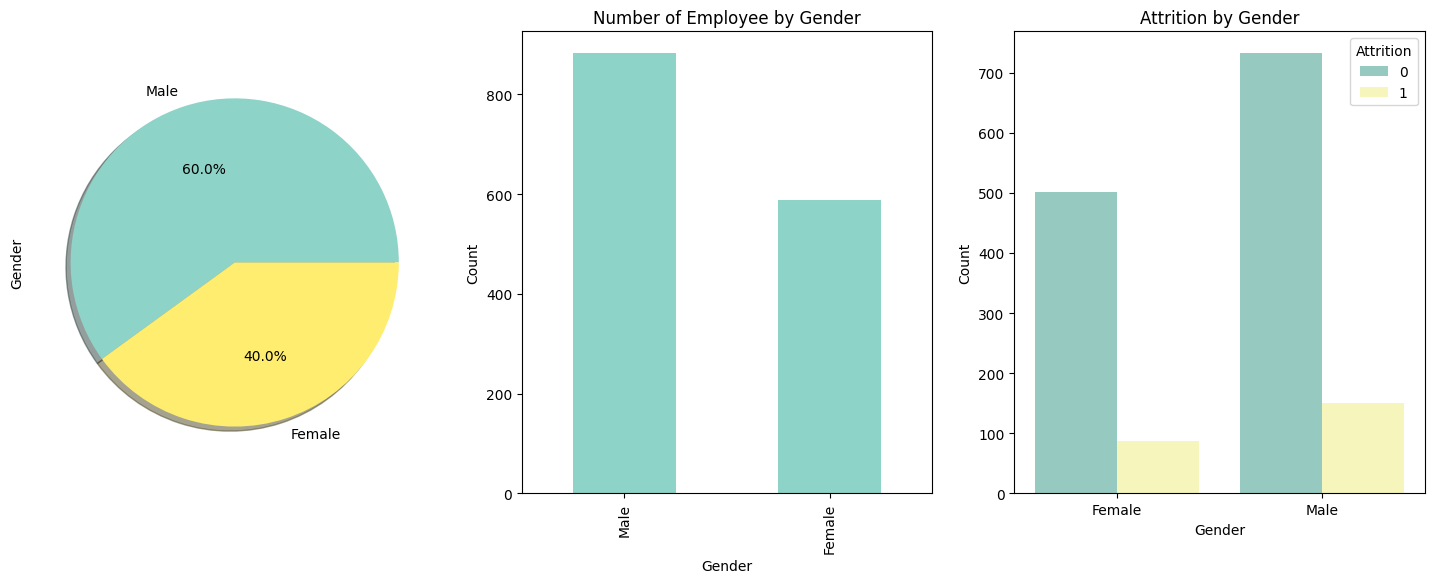

In [31]:
categorical_colum_investigaton(cat_col.value)

## Categorical numerical comparision

In [32]:
def categorical_numerical_comparision(numerical_col, caterical_col1, caterical_col2):
    f,ax = plt.subplots(1,2, figsize=(18,6))
    g1= sns.swarmplot(x=caterical_col1, y=numerical_col,hue='Attrition', data=employee_df, dodge=True, ax=ax[0], palette='Set2')
    ax[0].set_title(f'{numerical_col} vs {caterical_col1} separeted by Attrition')
    g1.set_xticklabels(g1.get_xticklabels(), rotation=45) 

    g2 = sns.swarmplot( x=caterical_col2, y=numerical_col,hue='Attrition', data=employee_df, dodge=True, ax=ax[1], palette='Set2')
    ax[1].set_title(f'{numerical_col} vs {caterical_col2} separeted by Attrition')
    g2.set_xticklabels(g2.get_xticklabels(), rotation=45) 

In [33]:
num_col1 = mr.Select(value="Age", 
                   choices=numerical_columns, 
                   label="Numerical column for categorical numerical comparision")
cat_col1 = mr.Select(value="Gender", 
                   choices=categorical_columns, 
                   label="Categorical column 1 for categorical numerical comparision")
cat_col2 = mr.Select(value="MaritalStatus", 
                   choices=categorical_columns, 
                   label="Categorical column 2 for categorical numerical comparision")

mercury.Select

mercury.Select

mercury.Select

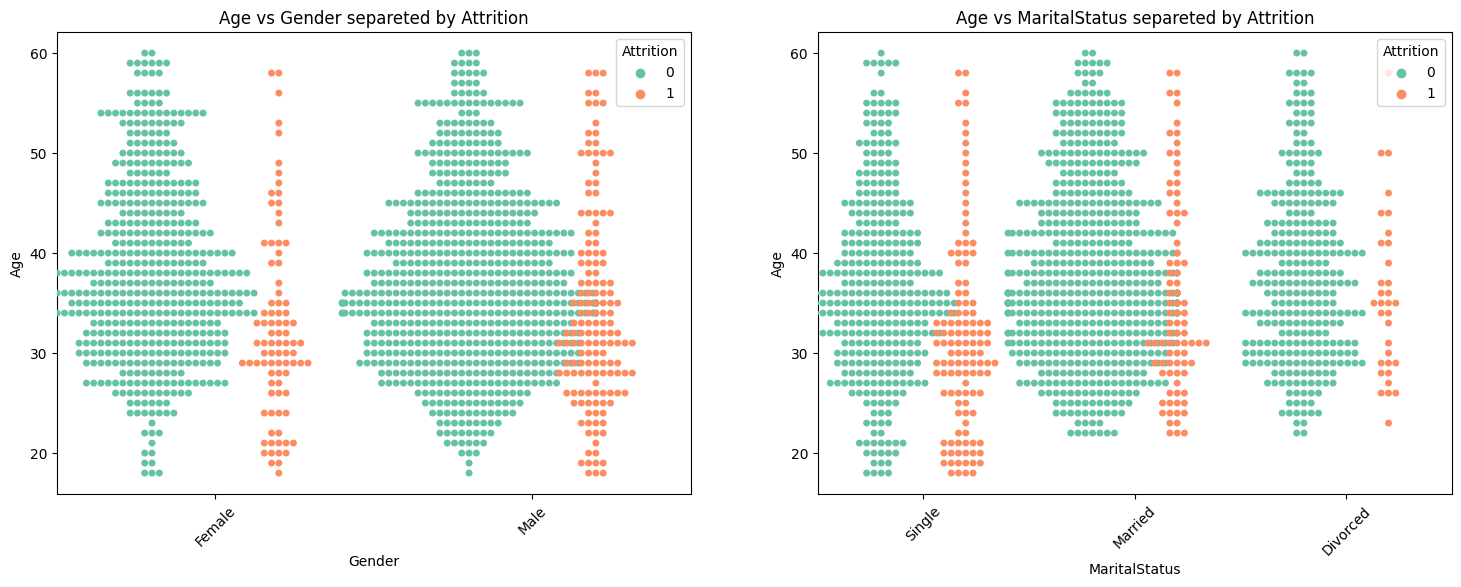

In [34]:
categorical_numerical_comparision(num_col1.value,cat_col1.value,cat_col2.value)

## Numerical column investigaton

In [35]:
attrition = employee_df[employee_df['Attrition'] == 1]
no_attrition = employee_df[employee_df['Attrition']==0]

In [36]:
def numerical_colum_investigaton(col_name):
    f,ax = plt.subplots(1,2, figsize=(18,6))
    sns.kdeplot(attrition[col_name], label='Employee who left',ax=ax[0], shade=True, color='palegreen')
    sns.kdeplot(no_attrition[col_name], label='Employee who stayes', ax=ax[0], shade=True, color='salmon')
    sns.boxplot(y=col_name, x='Attrition',data=employee_df, palette='Set2', ax=ax[1])

In [37]:
num_col_in = mr.Select(value="Age", 
                   choices=numerical_columns, 
                   label="Numerical column investigation")

mercury.Select

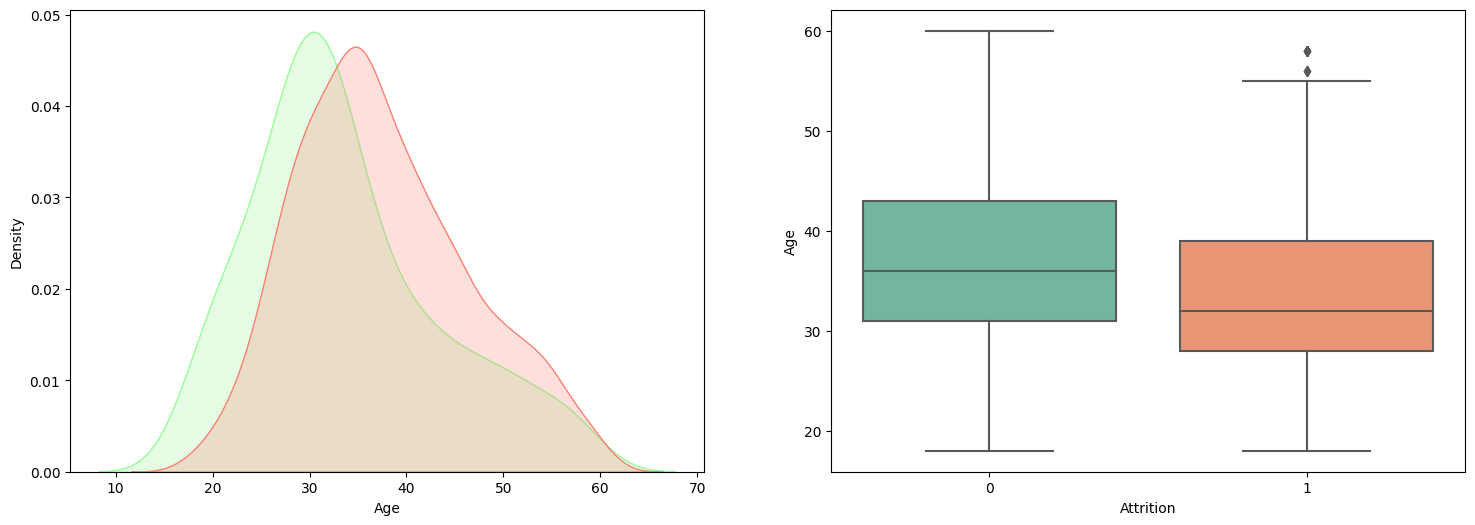

In [38]:
numerical_colum_investigaton(num_col_in.value)

# Feature Enginiring

Merging 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance' into one column 'Total_Satisfaction'

In [39]:
employee_df_t=employee_df.copy()

In [40]:
employee_df_t['Total_Satisfaction'] = (employee_df_t['EnvironmentSatisfaction'] + 
                                     employee_df_t['JobInvolvement'] + 
                                     employee_df_t['JobSatisfaction'] + 
                                     employee_df_t['RelationshipSatisfaction'] +
                                     employee_df_t['WorkLifeBalance']) /5 

In [41]:
# drop used column 
employee_df_t.drop(columns=['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance'], inplace=True)

In [42]:
employee_df['Total_Satisfaction']=employee_df_t['Total_Satisfaction']

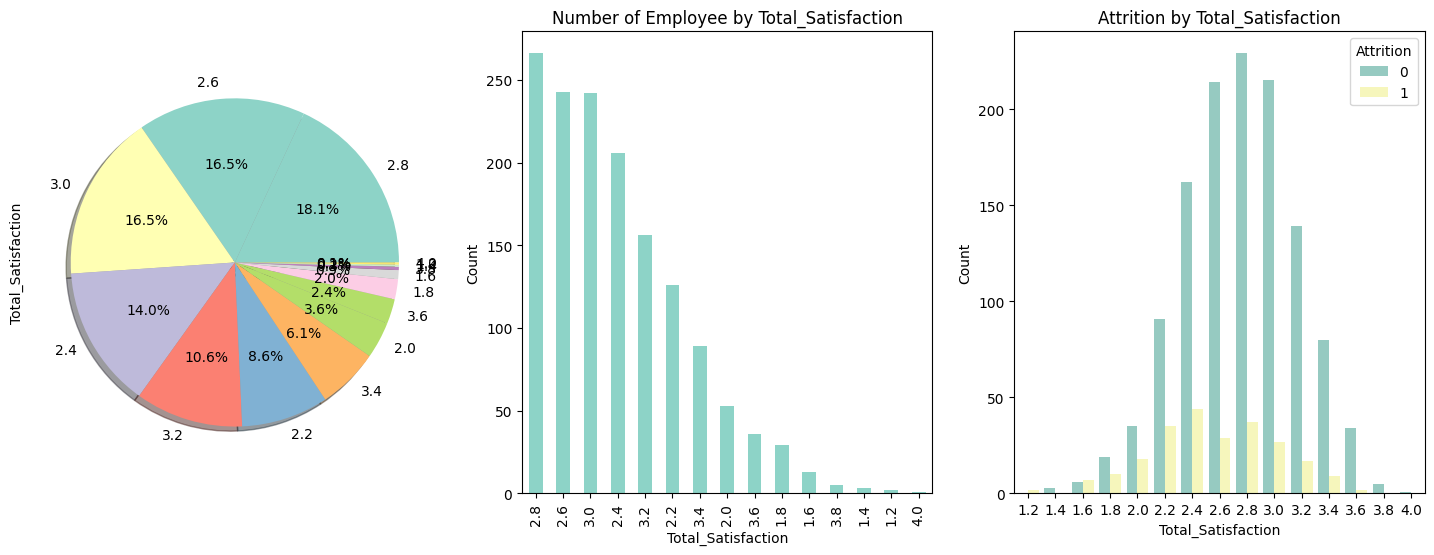

In [43]:
categorical_colum_investigaton('Total_Satisfaction')

If 'Total_Satisfaction' is >= 2.2 we consider it as satisified outherwise not<br>
For that we create a new column 'Total_Satisfaction_bool' and drop 'Total_Satisfaction'

In [44]:
employee_df_t['Total_Satisfaction_bool'] = employee_df_t['Total_Satisfaction'].apply(lambda x:1 if x>=2.2 else 0 ) 
employee_df_t.drop('Total_Satisfaction', axis=1, inplace=True)

In [45]:
employee_df_t['Age_bool'] = employee_df_t['Age'].apply(lambda x:1 if x<35 else 0)
employee_df_t.drop('Age', axis=1, inplace=True)

In [46]:
employee_df_t['DailyRate_bool'] = employee_df_t['DailyRate'].apply(lambda x:1 if x<750 else 0)
employee_df_t.drop('DailyRate', axis=1, inplace=True)

In [47]:
employee_df_t['Department_bool'] = employee_df_t['Department'].apply(lambda x:1 if x=='Sales' else 0)
employee_df_t.drop('Department', axis=1, inplace=True)

In [48]:
employee_df_t['DistanceFromHome_bool'] = employee_df_t['DistanceFromHome'].apply(lambda x:1 if x>10 else 0)
employee_df_t.drop('DistanceFromHome', axis=1, inplace=True)

In [49]:
employee_df_t['HourlyRate_bool'] = employee_df_t['HourlyRate'].apply(lambda x:1 if x<65 else 0)
employee_df_t.drop('HourlyRate', axis=1, inplace=True)

In [50]:
employee_df_t['JobRole_bool'] = employee_df_t['JobRole'].apply(lambda x:1 if x=='Sales Executive' else 0)
employee_df_t.drop('JobRole', axis=1, inplace=True)

In [51]:
employee_df_t['MonthlyIncome_bool'] = employee_df_t['MonthlyIncome'].apply(lambda x:1 if x<3500 else 0)
employee_df_t.drop('MonthlyIncome', axis=1, inplace=True)

In [52]:
employee_df_t['NumCompaniesWorked_bool'] = employee_df_t['NumCompaniesWorked'].apply(lambda x:1 if x>4 else 0)
employee_df_t.drop('NumCompaniesWorked', axis=1, inplace=True)

In [53]:
employee_df_t['TotalWorkingYears_bool'] = employee_df_t['TotalWorkingYears'].apply(lambda x:1 if x<8 else 0)
employee_df_t.drop('TotalWorkingYears', axis=1, inplace=True)

In [54]:
employee_df_t['YearsAtCompany_bool'] = employee_df_t['YearsAtCompany'].apply(lambda x:1 if x<3 else 0)
employee_df_t.drop('YearsAtCompany', axis=1, inplace=True)

In [55]:
employee_df_t['YearsInCurrentRole_bool'] = employee_df_t['YearsInCurrentRole'].apply(lambda x:1 if x<3 else 0)
employee_df_t.drop('YearsInCurrentRole', axis=1, inplace=True)

In [56]:
employee_df_t['YearsSinceLastPromotion_bool'] = employee_df_t['YearsSinceLastPromotion'].apply(lambda x:1 if x<1 else 0)
employee_df_t.drop('YearsSinceLastPromotion', axis=1, inplace=True)

In [57]:
employee_df_t['YearsWithCurrManager_bool'] = employee_df_t['YearsWithCurrManager'].apply(lambda x:1 if x<1 else 0)
employee_df_t.drop('YearsWithCurrManager', axis=1, inplace=True)

In [58]:
employee_df_t.drop('MonthlyRate', axis=1, inplace=True)
employee_df_t.drop('PercentSalaryHike', axis=1, inplace=True)

In [59]:
employee_df_t['Gender'] = employee_df_t['Gender'].apply(lambda x:1 if x=='Female' else 0)

In [60]:
convert_category = ['BusinessTravel','Education','EducationField','MaritalStatus','StockOptionLevel','OverTime','Gender','TrainingTimesLastYear']
for col in convert_category:
        employee_df_t[col] = employee_df_t[col].astype('category')

# Create testing and training dataset & perform data cleaning

In [61]:
#separate the categorical and numerical column
X_categorical = employee_df_t.select_dtypes(include=['category'])
X_numerical = employee_df_t.select_dtypes(include=['int64'])

In [62]:
y = employee_df_t['Attrition']

In [63]:
X_numerical.drop('Attrition', axis=1, inplace=True)

## OneHotEncoding for categorical data

In [64]:
#handle the categorical variable
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

X_categorical = onehotencoder.fit_transform(X_categorical).toarray()
X_categorical = pd.DataFrame(X_categorical)
X_categorical.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [65]:
#concat the categorical and numerical values

X_all = pd.concat([X_categorical, X_numerical], axis=1)

In [66]:
X_all.columns = X_all.columns.astype(str)

In [67]:
#Scaler the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [69]:

print(f"Train data shape: {X_train.shape}, Test Data Shape {X_test.shape}")

Train data shape: (1102, 48), Test Data Shape (368, 48)


# LOGISTIC REGRESSION CLASSIFIER

In [70]:
#import libraires
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression()

model.fit(X_train, y_train)
model

LogisticRegression()

In [71]:
y_pred = model.predict(X_test)

In [72]:
print("Accuracy of Logistic Regression: {:.2f}%".format(100* accuracy_score(y_pred, y_test)))

Accuracy of Logistic Regression: 88.86%


In [73]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(onehotencoder,open('encoder.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))